In [11]:
import mplfinance as mpf
import pandas as pd

In [12]:
def plot_engulfing_pattern(data, title):
    # Convert to DataFrame
    df = pd.DataFrame(data)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    # Create the plot
    mpf.plot(df, 
            type='candle',
            title=title,
            volume=False,  # Set to True if you have volume data
            style='charles',
            figsize=(10,5))

def is_bearish_engulfing(current_candle, previous_candle):
    """
    Detect bearish engulfing pattern.
    
    Args:
        current_candle (dict): Current day's OHLC data
        previous_candle (dict): Previous day's OHLC data

    """
    # Check if previous candle is bullish
    prev_bullish = previous_candle["Close"] > previous_candle["Open"]
    
    # Check if current candle is bearish
    curr_bearish = current_candle["Close"] < current_candle["Open"]
    
    # Check engulfing conditions
    engulfs_body = (current_candle["Open"] > previous_candle["Close"] and 
                   current_candle["Close"] < previous_candle["Open"])
    
    return prev_bullish and curr_bearish and engulfs_body

def is_bullish_engulfing(current_candle, previous_candle):
    """
    Detect bullish engulfing pattern.
    
    Args:
        current_candle (dict): Current day's OHLC data
        previous_candle (dict): Previous day's OHLC data
    """
    # Check if previous candle is bearish
    prev_bearish = previous_candle["Close"] < previous_candle["Open"]
    
    # Check if current candle is bullish
    curr_bullish = current_candle["Close"] > current_candle["Open"]
    
    # Check engulfing conditions
    engulfs_body = (current_candle["Open"] < previous_candle["Close"] and 
                   current_candle["Close"] > previous_candle["Open"])
    
    return prev_bearish and curr_bullish and engulfs_body

def find_engulfing_patterns(candles):
    """
    Find all engulfing patterns in a list of candles.
    
    Args:
        candles (list): List of dictionaries containing OHLC data
    """
    patterns = []
    
    for i in range(1, len(candles)):
        current = candles[i]
        previous = candles[i-1]
        
        if is_bearish_engulfing(current, previous):
            patterns.append({
                "date": current["Date"],
                "pattern": "Bearish Engulfing",
                "previous_candle": previous,
                "engulfing_candle": current
            })
            
        if is_bullish_engulfing(current, previous):
            patterns.append({
                "date": current["Date"],
                "pattern": "Bullish Engulfing",
                "previous_candle": previous,
                "engulfing_candle": current
            })
    
    return patterns

In [13]:
bullish_engulfing_data = [
    # Downtrend before pattern
    {"Date":"2024-09-01", "Open":110, "High":112, "Low":108, "Close":109},
    {"Date":"2024-09-02", "Open":109, "High":110, "Low":106, "Close":107},
    {"Date":"2024-09-03", "Open":107, "High":108, "Low":104, "Close":105},
    # Engulfing pattern
    {"Date":"2024-09-04", "Open":105, "High":105.5, "Low":103, "Close":104},  # Small bearish candle
    {"Date":"2024-09-05", "Open":103, "High":108, "Low":102, "Close":107},    # Bullish engulfing
    # Uptrend after pattern
    {"Date":"2024-09-06", "Open":107, "High":110, "Low":106, "Close":109}
]

# Sample data showing Bearish Engulfing Pattern
bearish_engulfing_data = [
    # Uptrend before pattern
    {"Date":"2024-09-01", "Open":100, "High":102, "Low":99, "Close":101},
    {"Date":"2024-09-02", "Open":101, "High":104, "Low":100, "Close":103},
    {"Date":"2024-09-03", "Open":103, "High":106, "Low":102, "Close":105},
    # Engulfing pattern
    {"Date":"2024-09-04", "Open":105, "High":108, "Low":104, "Close":107},    # Small bullish candle
    {"Date":"2024-09-05", "Open":108, "High":109, "Low":103, "Close":104},    # Bearish engulfing
    # Downtrend after pattern
    {"Date":"2024-09-06", "Open":104, "High":105, "Low":101, "Close":102}
]

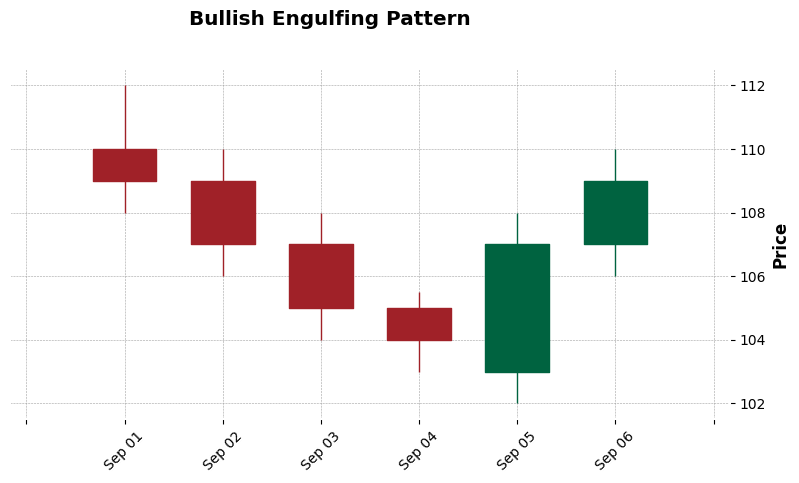

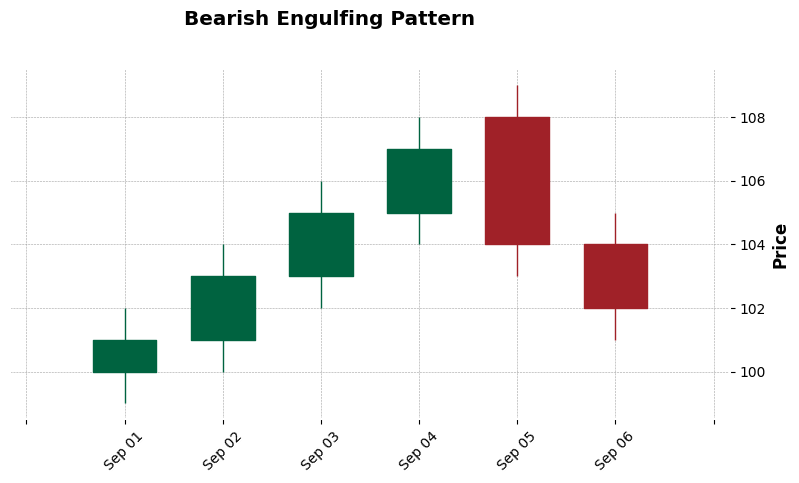

In [14]:
plot_engulfing_pattern(bullish_engulfing_data, 'Bullish Engulfing Pattern')
plot_engulfing_pattern(bearish_engulfing_data, 'Bearish Engulfing Pattern')

In [15]:
# Test with bullish engulfing data
bullish_patterns = find_engulfing_patterns(bullish_engulfing_data)
for pattern in bullish_patterns:
    print(f"\nFound {pattern['pattern']} on {pattern['date']}")
    print(f"Previous candle: Open={pattern['previous_candle']['Open']}, Close={pattern['previous_candle']['Close']}")
    print(f"Engulfing candle: Open={pattern['engulfing_candle']['Open']}, Close={pattern['engulfing_candle']['Close']}")
    
# Test with bearish engulfing data
bearish_patterns = find_engulfing_patterns(bearish_engulfing_data)
for pattern in bearish_patterns:
    print(f"\nFound {pattern['pattern']} on {pattern['date']}")
    print(f"Previous candle: Open={pattern['previous_candle']['Open']}, Close={pattern['previous_candle']['Close']}")
    print(f"Engulfing candle: Open={pattern['engulfing_candle']['Open']}, Close={pattern['engulfing_candle']['Close']}")


Found Bullish Engulfing on 2024-09-05
Previous candle: Open=105, Close=104
Engulfing candle: Open=103, Close=107

Found Bearish Engulfing on 2024-09-05
Previous candle: Open=105, Close=107
Engulfing candle: Open=108, Close=104
